# Weighted Logistic Regression for Imbalanced Dataset

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_classification
from jupyterthemes import jtplot

In [2]:
jtplot.style()

In [3]:
# create a imbalanced dataset of 10K with 2 class
x, y = make_classification(n_samples = 10_000  # number of samples
                          ,n_features = 2    # feature/label count
                          ,n_informative = 2 # informative features
                          ,n_redundant = 0   # redundant features
                          ,n_repeated = 0    # duplicate features
                          ,n_clusters_per_class = 1  # number of clusters per class; clusters during plotting
                          ,weights = [0.99]   # proportions of samples assigned to each class
                          ,flip_y = 0         # fraction of samples whose class is assigned randomly. 
                          ,random_state = 13)

In [4]:
df = pd.DataFrame(x,columns=['x1','x2'])
df['y'] = y

In [5]:
df.head()

,x1,x2,y
0,-1.911993,1.242198,0
1,-0.315770,0.578322,0
2,-1.506794,1.146743,0
3,-0.040029,0.466570,0
4,-1.420019,1.051144,0


In [8]:
df['y'].value_counts() / df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

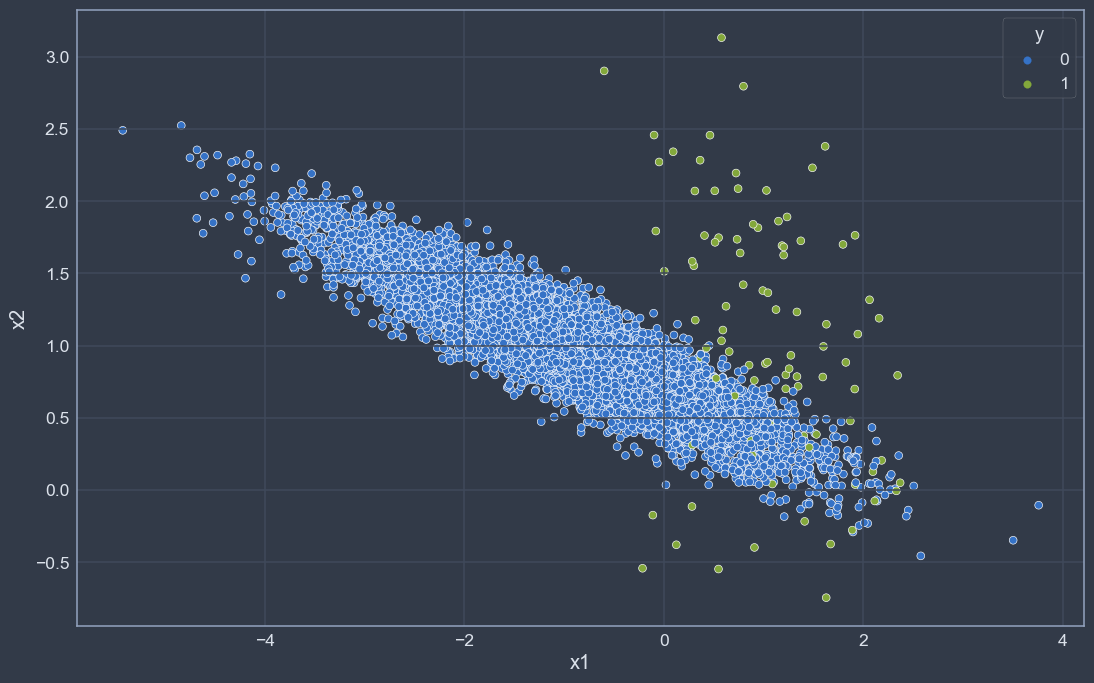

In [9]:
fig, ax = plt.subplots(figsize = (13, 8))
sns.scatterplot(data = df,x = 'x1',y = 'x2',hue = 'y');

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

In [11]:
x = df.drop('y',axis=1)
y = df['y']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 13)

In [13]:
clf = LogisticRegression(random_state=15, class_weight=None)

In [14]:
clf

LogisticRegression(random_state=15)

In [15]:
clf.fit(X_train, y_train)

LogisticRegression(random_state=15)

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2971
           1       0.93      0.48      0.64        29

    accuracy                           0.99      3000
   macro avg       0.96      0.74      0.82      3000
weighted avg       0.99      0.99      0.99      3000



In [18]:
plotter = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))

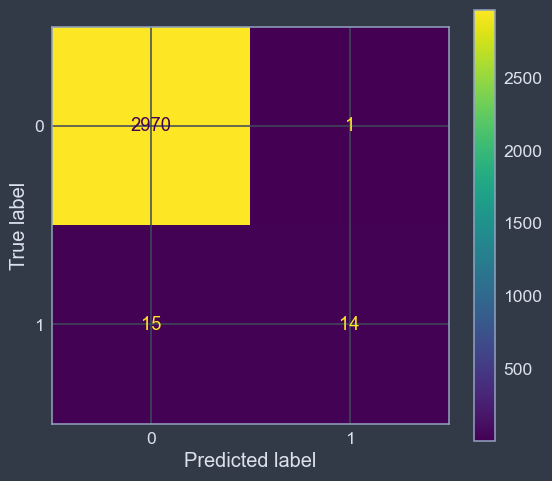

In [19]:
plotter.plot()

# Weighted Logistic Regression

In [22]:
df['y'].value_counts() / df.shape[0]

0    0.99
1    0.01
Name: y, dtype: float64

In [23]:
w = {0 : 1, 1 : 99}

In [24]:
clf = LogisticRegression(random_state=15, class_weight=w)

In [25]:
clf

LogisticRegression(class_weight={0: 1, 1: 99}, random_state=15)

In [26]:
clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 99}, random_state=15)

In [27]:
y_pred = clf.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      2971
           1       0.08      0.86      0.14        29

    accuracy                           0.90      3000
   macro avg       0.54      0.88      0.54      3000
weighted avg       0.99      0.90      0.94      3000



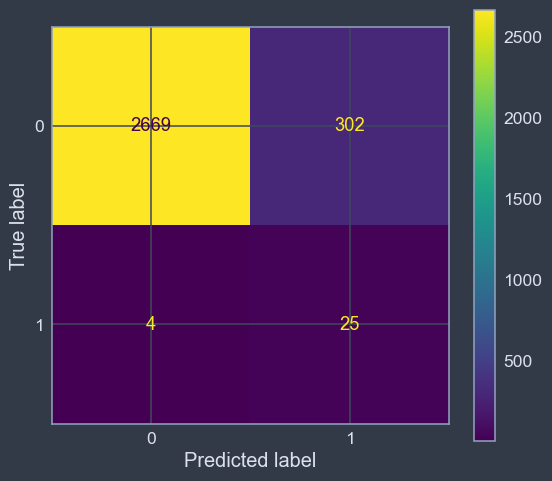

In [29]:
plotter = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
plotter.plot()

# Weights GridSearch

In [30]:
# define weight hyperparameter
w = [{0:1000,1:100},{0:1000,1:10}, {0:1000,1:1.0}, 
     {0:500,1:1.0}, {0:400,1:1.0}, {0:300,1:1.0}, {0:200,1:1.0}, 
     {0:150,1:1.0}, {0:100,1:1.0}, {0:99,1:1.0}, {0:10,1:1.0}, 
     {0:0.01,1:1.0}, {0:0.01,1:10}, {0:0.01,1:100}, 
     {0:0.001,1:1.0}, {0:0.005,1:1.0}, {0:1.0,1:1.0}, 
     {0:1.0,1:0.1}, {0:10,1:0.1}, {0:100,1:0.1}, 
     {0:10,1:0.01}, {0:1.0,1:0.01}, {0:1.0,1:0.001}, {0:1.0,1:0.005}, 
     {0:1.0,1:10}, {0:1.0,1:99}, {0:1.0,1:100}, {0:1.0,1:150}, 
     {0:1.0,1:200}, {0:1.0,1:300},{0:1.0,1:400},{0:1.0,1:500}, 
     {0:1.0,1:1000}, {0:10,1:1000},{0:100,1:1000} ]

In [31]:
hyperparam_grid = {'class_weight' : w}

In [32]:
clf = LogisticRegression(random_state=15)

In [33]:
df.shape

(10000, 3)

In [34]:
grid = GridSearchCV(clf, hyperparam_grid, scoring='f1', cv = 100, n_jobs=-1)

In [36]:
grid.fit(x, y)

GridSearchCV(cv=100, estimator=LogisticRegression(random_state=15), n_jobs=-1,
             param_grid={'class_weight': [{0: 1000, 1: 100}, {0: 1000, 1: 10},
                                          {0: 1000, 1: 1.0}, {0: 500, 1: 1.0},
                                          {0: 400, 1: 1.0}, {0: 300, 1: 1.0},
                                          {0: 200, 1: 1.0}, {0: 150, 1: 1.0},
                                          {0: 100, 1: 1.0}, {0: 99, 1: 1.0},
                                          {0: 10, 1: 1.0}, {0: 0.01, 1: 1.0},
                                          {0: 0.01, 1: 10}, {0: 0.01, 1: 100},
                                          {0: 0.001, 1: 1.0},
                                          {0: 0.005, 1: 1.0}, {0: 1.0, 1: 1.0},
                                          {0: 1.0, 1: 0.1}, {0: 10, 1: 0.1},
                                          {0: 100, 1: 0.1}, {0: 10, 1: 0.01},
                                          {0: 1.0, 1: 0.01}, {0: 1.0, 1: 0.001},
                                          {0: 1.0, 1: 0.005}, {0: 1.0, 1: 10},
                                          {0: 1.0, 1: 99}, {0: 1.0, 1: 100},
                                          {0: 1.0, 1: 150}, {0: 1.0, 1: 200},
                                          {0: 1.0, 1: 300}, ...]},
             scoring='f1')

In [37]:
grid.best_score_

0.4783333333333332

In [38]:
grid.best_params_

{'class_weight': {0: 100, 1: 1000}}

In [39]:
clf = LogisticRegression(random_state=15, **grid.best_params_)

In [40]:
clf.fit(X_train, y_train)

LogisticRegression(class_weight={0: 100, 1: 1000}, random_state=15)

In [42]:
y_pred = clf.predict(X_test)

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2971
           1       0.31      0.62      0.41        29

    accuracy                           0.98      3000
   macro avg       0.65      0.80      0.70      3000
weighted avg       0.99      0.98      0.99      3000



In [48]:
clf.coef_[0][0]

3.367382171126419

In [49]:
clf.intercept_[0]

-5.634793800978246

$$0 = w_1 x + w_2 y + w_0$$

$$y = -\frac{w_1}{w_2} x - \frac{w_0}{w_2}$$

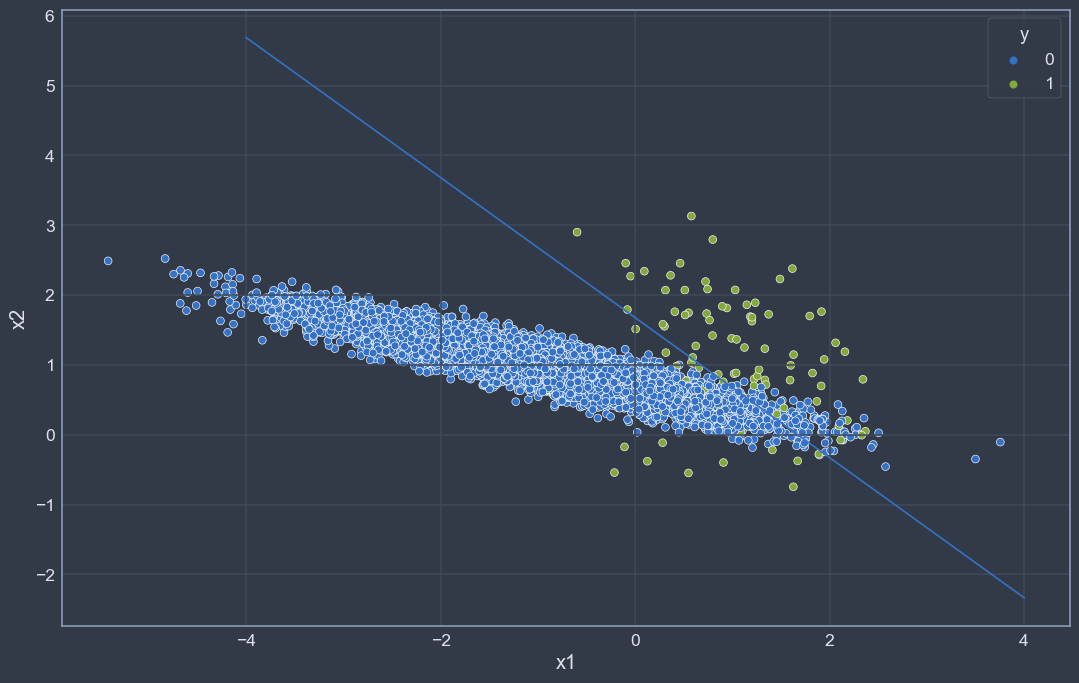

In [52]:
fig, ax = plt.subplots(figsize = (13, 8))
x = np.linspace(-4, 4)
sns.scatterplot(data = df,x = 'x1',y = 'x2',hue = 'y', ax = ax)
ax.plot(x, -(clf.coef_[0][0] / clf.coef_[0][1]) * x - (clf.intercept_[0] / clf.coef_[0][1]));